In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Constants:
all_data_desktop = r'C:\Data Sciences\data\all_data'
in_desktop = r'C:\Data Sciences\data\in'
out_desktop = r'C:\Data Sciences\data\out'

In [2]:
df = pd.read_excel(r'C:\Data Sciences\data\in\spend_data.xlsx').fillna("Other")
df.drop(['Income/Expense','Note2','Amount','Currency','Account3'], axis=1, inplace=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         109 non-null    datetime64[ns]
 1   Account      109 non-null    object        
 2   Category     109 non-null    object        
 3   Subcategory  109 non-null    object        
 4   Note         109 non-null    object        
 5   USD          109 non-null    float64       
 6   Year         109 non-null    int64         
 7   Month        109 non-null    int64         
 8   Day          109 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 7.8+ KB


In [4]:
df.head()

,Date,Account,Category,Subcategory,Note,USD,Year,Month,Day
0,2022-02-01 08:43:02,AMEX,Groceries,Other,Price chopper,206.80,2022,2,1
1,2022-02-01 09:50:43,AMEX,Fuel,Other,Casey's,64.02,2022,2,1
2,2022-02-01 09:51:03,AMEX,Transportation,Car,Casey's,16.00,2022,2,1
3,2022-02-01 09:51:25,AMEX,Food,Snacks,Casey's,13.69,2022,2,1
4,2022-02-01 14:28:26,AMEX,Beauty,Cosmetics,Scotch and Scissors,56.00,2022,2,1


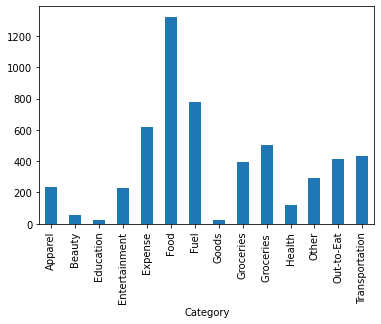

In [5]:
#plot the bar graph of marital status with average value of response_rate
df.groupby('Category')['USD'].sum().plot.bar()
plt.show()

In [6]:
piv_1 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Category'], 
                                columns=['Month'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),2)

piv_1

sum                           
Month                 2        3        4    Total
Category                                          
Apparel          237.15     0.00     0.00   237.15
Beauty            56.00     0.00     0.00    56.00
Education          0.00     0.00    21.88    21.88
Entertainment    231.27     0.00     0.00   231.27
Expense            0.00   616.93     0.00   616.93
Food             562.88   717.46    42.02  1322.36
Fuel             135.67   372.87   268.11   776.65
Goods             25.44     0.00     0.00    25.44
Groceries        285.87   105.96     0.00   391.83
Groceries          0.00     0.00   506.24   506.24
Health             0.00   111.00    11.19   122.19
Other            106.87     0.00   185.00   291.87
Out-to-Eat         0.00     0.00   414.76   414.76
Transportation    31.00   400.04     0.00   431.04
Total           1672.15  2324.26  1449.20  5445.61

In [7]:
piv_2 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Subcategory'], 
                                columns=['Category'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),2)

piv_2

sum                                                          \
Category     Apparel Beauty Education Entertainment Expense     Food    Fuel   
Subcategory                                                                    
Allowance       0.00      0      0.00          0.00  150.00     0.00    0.00   
Beverages       0.00      0      0.00          0.00    0.00   239.41    0.00   
Car             0.00      0      0.00          0.00    0.00     0.00    0.00   
Clothing      106.00      0      0.00          0.00    0.00     0.00    0.00   
Cosmetics       0.00     56      0.00          0.00    0.00     0.00    0.00   
Dinner          0.00      0      0.00          0.00    0.00    19.48    0.00   
Eating out      0.00      0      0.00          0.00    0.00  1010.88    0.00   
Haircut         0.00      0      0.00          0.00    0.00     0.00    0.00   
Health          0.00      0      0.00          0.00    0.00     0.00    0.00   
Maintenance     0.00      0      0.00          0.00    0.00     0.00    0.00   
Medicine        0.00      0      0.00          0.00    0.00     0.00    0.00   
Motorcycle      0.00      0      0.00          0.00    0.00     0.00    0.00   
Other           0.00      0      0.00        231.27    0.00     0.00  776.65   
Phone           0.00      0      0.00          0.00  466.93     0.00    0.00   
Sammie          0.00      0      0.00          0.00    0.00     0.00    0.00   
Shoes         131.15      0      0.00          0.00    0.00     0.00    0.00   
Snacks          0.00      0      0.00          0.00    0.00    52.59    0.00   
Textbooks       0.00      0     21.88          0.00    0.00     0.00    0.00   
Total         237.15     56     21.88        231.27  616.93  1322.36  776.65   

                                                                     \
Category      Goods Groceries Groceries   Health   Other Out-to-Eat   
Subcategory                                                           
Allowance      0.00      0.00       0.00    0.00    0.00       0.00   
Beverages      0.00      0.00       0.00    0.00    0.00       0.00   
Car            0.00      0.00       0.00    0.00    0.00       0.00   
Clothing       0.00      0.00       0.00    0.00    0.00       0.00   
Cosmetics      0.00      0.00       0.00    0.00    0.00       0.00   
Dinner         0.00      0.00       0.00    0.00    0.00       0.00   
Eating out     0.00      0.00       0.00    0.00    0.00       0.00   
Haircut        0.00      0.00       0.00   51.00    0.00       0.00   
Health         0.00      0.00       0.00   60.00    0.00       0.00   
Maintenance    0.00      0.00       0.00    0.00    0.00       0.00   
Medicine       0.00      0.00       0.00   11.19    0.00       0.00   
Motorcycle     0.00      0.00       0.00    0.00    0.00       0.00   
Other         25.44    391.83     506.24    0.00  218.25     414.76   
Phone          0.00      0.00       0.00    0.00    0.00       0.00   
Sammie         0.00      0.00       0.00    0.00   73.62       0.00   
Shoes          0.00      0.00       0.00    0.00    0.00       0.00   
Snacks         0.00      0.00       0.00    0.00    0.00       0.00   
Textbooks      0.00      0.00       0.00    0.00    0.00       0.00   
Total         25.44    391.83     506.24  122.19  291.87     414.76   

                                      
Category     Transportation    Total  
Subcategory                           
Allowance              0.00   150.00  
Beverages              0.00   239.41  
Car                   49.00    49.00  
Clothing               0.00   106.00  
Cosmetics              0.00    56.00  
Dinner                 0.00    19.48  
Eating out             0.00  1010.88  
Haircut                0.00    51.00  
Health                 0.00    60.00  
Maintenance          162.35   162.35  
Medicine               0.00    11.19  
Motorcycle           219.69   219.69  
Other                  0.00  2564.44  
Phone                  0.00   466.93  
Sammie                 0.00   

In [8]:
piv_3 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Category','Subcategory'], 
                                columns=['Month'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),0)

df_piv_3 = pd.DataFrame(piv_3)
df_piv_3.to_excel(out_desktop + '\piv_3.xlsx')
df_piv_3

sum                        
Month                             2       3       4   Total
Category       Subcategory                                 
Apparel        Clothing       106.0     0.0     0.0   106.0
               Shoes          131.0     0.0     0.0   131.0
Beauty         Cosmetics       56.0     0.0     0.0    56.0
Education      Textbooks        0.0     0.0    22.0    22.0
Entertainment  Other          231.0     0.0     0.0   231.0
Expense        Allowance        0.0   150.0     0.0   150.0
               Phone            0.0   467.0     0.0   467.0
Food           Beverages       75.0   122.0    42.0   239.0
               Dinner          19.0     0.0     0.0    19.0
               Eating out     437.0   574.0     0.0  1011.0
               Snacks          31.0    21.0     0.0    53.0
Fuel           Other          136.0   373.0   268.0   777.0
Goods          Other           25.0     0.0     0.0    25.0
Groceries      Other          286.0   106.0     0.0   392.0
Groceries      Other            0.0     0.0   506.0   506.0
Health         Haircut          0.0    51.0     0.0    51.0
               Health           0.0    60.0     0.0    60.0
               Medicine         0.0     0.0    11.0    11.0
Other          Other           33.0     0.0   185.0   218.0
               Sammie          74.0     0.0     0.0    74.0
Out-to-Eat     Other            0.0     0.0   415.0   415.0
Transportation Car             31.0    18.0     0.0    49.0
               Maintenance      0.0   162.0     0.0   162.0
               Motorcycle       0.0   220.0     0.0   220.0
Total                        1672.0  2324.0  1449.0  5446.0

In [9]:
piv_4 = np.round(pd.pivot_table(df, values='USD', 
                                index=['Subcategory','Note'], 
                                columns=['Category'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, 
                                margins_name='Total'),2)

piv_4

sum                                         \
Category                     Apparel Beauty Education Entertainment Expense   
Subcategory Note                                                              
Allowance   Cash withdrawal     0.00      0      0.00          0.00  150.00   
Beverages   Bar West            0.00      0      0.00          0.00    0.00   
            Buddy's             0.00      0      0.00          0.00    0.00   
            Callahan            0.00      0      0.00          0.00    0.00   
            Casey's             0.00      0      0.00          0.00    0.00   
...                              ...    ...       ...           ...     ...   
Snacks      Buddy's             0.00      0      0.00          0.00    0.00   
            Casey's             0.00      0      0.00          0.00    0.00   
            QT                  0.00      0      0.00          0.00    0.00   
Textbooks   Amazon              0.00      0     21.88          0.00    0.00   
Total                         237.15     56     21.88        231.27  616.93   

                                                                           \
Category                         Food    Fuel  Goods Groceries Groceries    
Subcategory Note                                                            
Allowance   Cash withdrawal      0.00    0.00   0.00      0.00       0.00   
Beverages   Bar West            12.00    0.00   0.00      0.00       0.00   
            Buddy's             27.52    0.00   0.00      0.00       0.00   
            Callahan            53.68    0.00   0.00      0.00       0.00   
            Casey's              3.05    0.00   0.00      0.00       0.00   
...                               ...     ...    ...       ...        ...   
Snacks      Buddy's             21.37    0.00   0.00      0.00       0.00   
            Casey's             19.19    0.00   0.00      0.00       0.00   
            QT                  12.03    0.00   0.00      0.00       0.00   
Textbooks   Amazon               0.00    0.00   0.00      0.00       0.00   
Total                         1322.36  776.65  25.44    391.83     506.24   

                                                                        \
Category                      Health   Other Out-to-Eat Transportation   
Subcategory Note                                                         
Allowance   Cash withdrawal     0.00    0.00       0.00           0.00   
Beverages   Bar West            0.00    0.00       0.00           0.00   
            Buddy's             0.00    0.00       0.00           0.00   
            Callahan            0.00    0.00       0.00           0.00   
            Casey's             0.00    0.00       0.00           0.00   
...                              ...     ...        ...            ...   
Snacks      Buddy's             0.00    0.00       0.00           0.00   
            Casey's             0.00    0.00       0.00           0.00   
            QT                  0.00    0.00       0.00           0.00   
Textbooks   Amazon              0.00    0.00       0.00           0.00   
Total                         122.19  291.87     414.76         431.04   

                                       
Category                        Total  
Subcategory Note                       
Allowance   Cash withdrawal    150.00  
Beverages   Bar West            12.00  
            Buddy's             27.52  
            Callahan            53.68  
            Casey's              3.05  
...                               ...  
Snacks      Buddy's             21.37  
            Casey's             19.19  
            QT                  12.03  
Textbooks   Amazon              21.88  
Total                         5445.61  

[73 rows x 15 columns]